## Worldwide PM polution and related mortality
#### PM concentrations for countries worldwide and related mortality numbers

This data contains concentration values for Particulate Matter (PM) in cities worldwide throughout the years and respective total deaths due to air pollution and deaths due to particulate matter.

**Tipos principales de PM**

Se clasifican según su **diametro aerodinamico**:

- **PM10:** ≤ 10 micras	*(Partículas gruesas: polvo, polen, moho).*
- **PM2.5:** ≤ 2.5 micras *(Partículas finas: emisiones de vehículos, combustión, humo).*

In [19]:
#Cargar dataset
import pandas as pd

worldwide_polution = pd.read_csv('C:/Users/THINKBOOK/Documents/1. ESTUDIOS y FORMACIONES/1. BOOTCAMP DATA SCIENCE/Desarrollos de las clases/Clase 7 - Taller en Pandas/Worldwide polution and mortality.csv')
worldwide_polution

,Country,Year,PM2.5,PM10,TotalDeaths,PMDeaths,CitiesCount
0,Albania,2015,21.790000,32.415000,42.299773,21.786089,2
1,Albania,2016,21.480000,32.385000,41.018788,20.810664,2
2,Argentina,2015,10.260000,27.870000,33.086924,29.159094,1
3,Australia,2010,8.040000,15.323333,13.571713,13.140380,3
4,Australia,2011,7.316667,14.443333,13.727626,13.276676,3
...,...,...,...,...,...,...,...
328,United Kingdom,2014,11.708857,16.533143,18.084411,16.384936,35
329,United Kingdom,2015,9.711026,15.436154,18.243927,16.509079,39
330,United Kingdom,2016,10.245143,16.430857,17.891337,16.145949,35
331,United Kingdom,2017,9.039737,14.872105,17.783700,16.047669,38


### Limpieza de datos

In [21]:
#renombrar columnas
worldwide_polution = worldwide_polution.rename(columns = {'PM2.5' : 'Particulate matter 2.5'})
worldwide_polution = worldwide_polution.rename(columns = {'PM10' : 'Particulate matter 10'})
worldwide_polution.head()

,Country,Year,Particulate matter 2.5,Particulate matter 10,TotalDeaths,PMDeaths,CitiesCount
0,Albania,2015,21.790000,32.415000,42.299773,21.786089,2
1,Albania,2016,21.480000,32.385000,41.018788,20.810664,2
2,Argentina,2015,10.260000,27.870000,33.086924,29.159094,1
3,Australia,2010,8.040000,15.323333,13.571713,13.140380,3
4,Australia,2011,7.316667,14.443333,13.727626,13.276676,3


In [22]:
#Verificar valores nulos en todo el data frame 
worldwide_polution.isna().any().any()

False

### Formulación de pregunta y solución 

Pregunta: 

1. *¿Que país presenta la mayor concentración de material particulado a lo largo del tiempo? ¿Está relacionado este factor con las muertes en ese paíse y de manera general en los otros países?*

Debido a que no todos los países presentan datos de concentraciones PM 2.5 y PM 10 para los mismos años, ni la misma cantidad de registros por país se usará la media o promedio para analizar la información.  

In [97]:
#Promedio del material particulado (2.5 micras) por pais
PM_mean_by_country = worldwide_polution.groupby('Country')['Particulate matter 2.5'].mean().sort_values(ascending = False)
PM_mean_by_country

Country
Uganda        104.300000
Mongolia       86.173750
Cameroon       82.666667
Bangladesh     80.564625
China          70.008403
                 ...    
Canada          6.703380
Estonia         6.683333
Finland         6.497436
Sweden          6.424064
Iceland         6.140000
Name: Particulate matter 2.5, Length: 74, dtype: float64

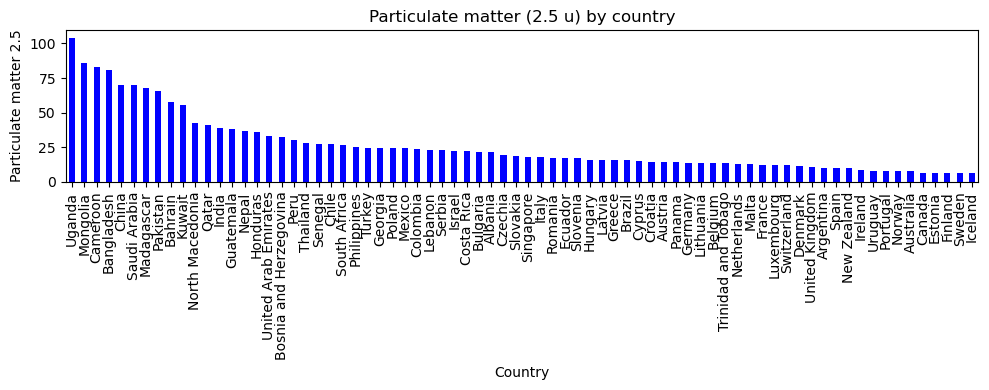

In [98]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,4)) #crear figura
PM_mean_by_country.plot(kind = 'bar', color = 'blue') #Generar grafico de barras
plt.ylabel('Particulate matter 2.5')
plt.xlabel('Country')
plt.title('Particulate matter (2.5 u) by country')

plt.tight_layout()
plt.show()

Observamos para este caso, que Uganda resulta ser el país en promedio con mayor concentración de material particulado (2.5 micras ) a lo largo del tiempo.

In [95]:
#Promedio del material particulado (10 micras) por pais
PM2_mean_by_country = worldwide_polution.groupby('Country')['Particulate matter 10'].mean().sort_values(ascending = False)
PM2_mean_by_country

Country
Pakistan    271.751667
Bahrain     267.430000
Mongolia    179.025000
Uganda      170.400000
Qatar       143.833333
               ...    
Ireland      14.842639
Finland      13.414722
Canada       13.341151
Estonia      12.737917
Iceland       9.526857
Name: Particulate matter 10, Length: 74, dtype: float64

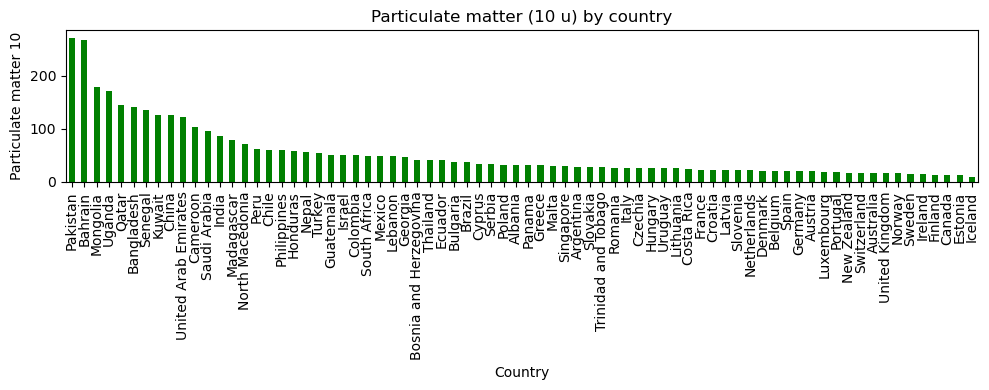

In [96]:
import matplotlib.pyplot as plt 

plt.figure(figsize = (10,4)) #crear figura
PM2_mean_by_country.plot(kind = 'bar', color = 'green') #Generar grafico de barras
plt.ylabel('Particulate matter 10')
plt.xlabel('Country')
plt.title('Particulate matter (10 u) by country')

plt.tight_layout()
plt.show()

Observamos en este caso a diferencia del caso anterior, Pakistán resulta ser resulta ser el país en promedio con mayor concentración de material particulado (2.5 micras ) a lo largo del tiempo. 

Para observar de manera general la relación entre la emisión de material particulado de 2.5 y 10 micras y las muertes por país debido a dicho factor, realizamos un analisis de correlación.

In [99]:
mortality_corr = worldwide_polution.groupby('Country')[['Particulate matter 2.5', 'Particulate matter 10', 'PMDeaths']].mean().corr()
mortality_corr

,Particulate matter 2.5,Particulate matter 10,PMDeaths
Particulate matter 2.5,1.000000,0.808993,0.555848
Particulate matter 10,0.808993,1.000000,0.637079
PMDeaths,0.555848,0.637079,1.000000


A partir de este analisis podemos observar que efectivamente el material particulado está relacionado directamente con las muertes en cada pais en un 55,5848 % para emisiones de 2.5 micras y en un 63.7079 % para emisiones de 10 micras.

### Análisis del caso particular de una de los países con mayor polución: Pakistán

Observamos si existe una relación entre la emisión de material particulado y las muertes, para ello analizamos, *las muertes (atribuidas a las exposición de dicho material) por año* y la *cantidad de material particulado emitido en su totalidad por año*. 

In [105]:
#Muertes por año debido al material particulado en Pakistan
DataPakistan = worldwide_polution[worldwide_polution ['Country'] == 'Pakistan']
Death_by_years = DataPakistan[['Year','PMDeaths']]
Death_by_years

,Year,PMDeaths
235,2010,59.511668
236,2013,58.612352


<Figure size 1000x400 with 0 Axes>

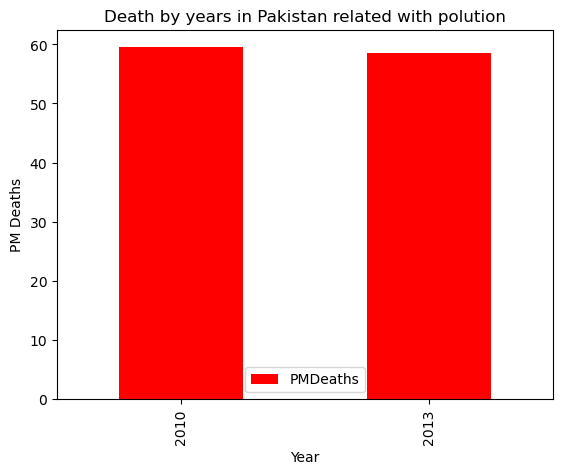

In [106]:
plt.figure(figsize = (10,4)) #crear figura
Death_by_years.plot(kind = 'bar', color = 'red', x = 'Year', y = 'PMDeaths') 
plt.ylabel('PM Deaths')
plt.xlabel('Year')
plt.title('Death by years in Pakistan related with polution')
plt.show()

Se tiene pocos datos sobre Pakistán a comparación de otros países, sin embargo a partir de la información que se tiene es posible apreciar que el año con más muertes debido a la exposición a material particulado resultado ser el año **2010**, seguido no muy lejos del año **2013** con una *tendencia ligera de disminución en las muertes*.

In [108]:
#Polución por año en Pakistan (analisis de la polucion total)
Polution_by_years = DataPakistan[['Year','Total PM']]
Polution_by_years.head()

,Year,Total PM
235,2010,490.666667
236,2013,184.670000


<Figure size 1000x400 with 0 Axes>

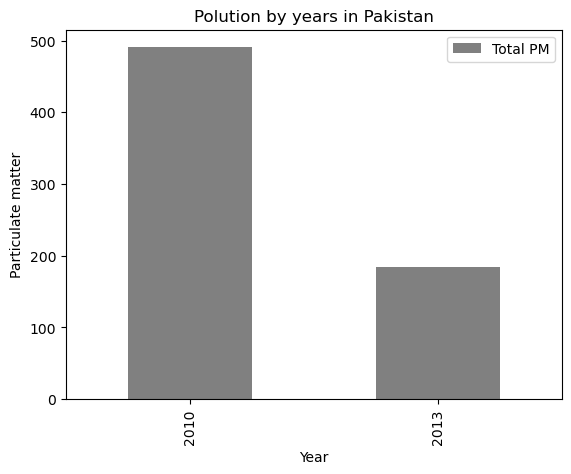

In [109]:
plt.figure(figsize = (10,4)) #crear figura
Polution_by_years.plot(kind = 'bar', color = 'grey', x = 'Year', y = 'Total PM') 
plt.ylabel('Particulate matter')
plt.xlabel('Year')
plt.title('Polution by years in Pakistan')
plt.show()

En el gráfico anterior podemos identificar que la emisión de material particulado para el año **2010** fue considerablemente superior al año 2013 y se correponde con las numerosas muertes ocurridas en ese año debido a dicho factor, mientras que para el **2013** este factor resulta ser considerablemente bajo en comparación al del 2010, valdría la pena si se desea indagar más obtener más registros correspondientes a los años 2011 y 2012 para poder correlacionar con mayor certeza las muertes debido al material particulado presentadas ese año.

2. *¿Cómo ha evolucionado la contaminación y la mortalidad a lo largo del tiempo?*

A continuación se realiza un análisis temporal para observar como ha evolucionado la contaminación y la mortalidad a lo largo del tiempo, lo que nos permite de manera general correlacionar una vez más dichos factores entre sí.

<Axes: title={'center': 'Polution by years'}, xlabel='Year', ylabel='Total PM'>

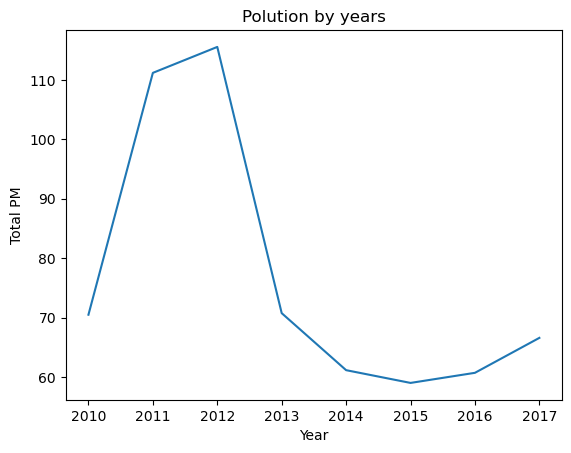

In [114]:
#Polución/contaminación a lo largo del tiempo
yearly_pm = worldwide_polution.groupby('Year')['Total PM'].mean()

plt.ylabel('Total PM')
plt.xlabel('Year')
plt.title('Polution by years')
yearly_pm.plot()

#### 📈 Gráfica 1: "Polution by years" (Total PM)

*Conclusiones*

- Muestra una tendencia ascendente entre 2010 y 2012, alcanzando el *punto máximo en 2012*.
- A partir de 2012, hay una caída drástica en la concentración total de material particulado hasta 2015.
- Entre 2015 y 2017, se estabiliza con una ligera tendencia ascendente.

<Axes: title={'center': 'Deaths by years'}, xlabel='Year', ylabel='PM Deaths'>

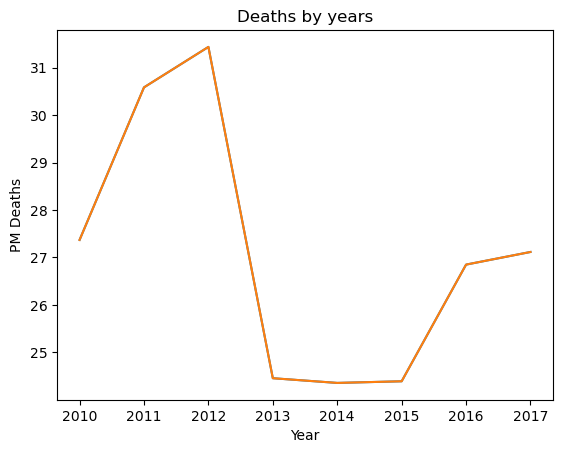

In [115]:
#Muertes a lo largo del tiempo
yearly_pm_deaths = worldwide_polution.groupby('Year')['PMDeaths'].mean()
yearly_pm_deaths.plot()

plt.ylabel('PM Deaths')
plt.xlabel('Year')
plt.title('Deaths by years')
yearly_pm_deaths.plot()

#### 📉 Gráfica 2: "Deaths by years" (PM Deaths)

*Conclusiones*

- Muestra un comportamiento similar al del Total PM: incremento hasta 2012, luego una caída importante hasta 2013 y se mantiene constante entre ese período y el 2015.
- Después de 2015, hay un repunte leve, pero no tan marcado como en la concentración.

### 📌 Conclusiones finales
**1. Alta correlación positiva aparente** entre la concentración de material particulado y las muertes asociadas:

- Los picos y descensos de ambas curvas coinciden.
- Esto **sugiere fuertemente una relación causal o al menos asociativa** entre el aumento de PM y el número de muertes.

**2. Políticas o intervenciones ambientales después de 2012** podrían haber reducido significativamente la concentración de contaminantes, lo que también se reflejó en la reducción de muertes.

**3. A pesar de la reducción, **hay un ligero repunte desde 2015** en ambas curvas, lo que podría alertar sobre una **debilitamiento o suavización en las políticas ambientales o cambios industriales**.

In [1]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
